# Barabási-model in Octave

the function named "barabasi" is an octave implementation of the classical random graph.

In [24]:
'script!';# dummy line for interpreting as script
function edge=barabasi(m,n_step)
# parameters:
# input:
# m: how many old vertices are chosen at each step? m>1
# n_step: number of steps including the initial one
# output:
# edge: an array for storing the edges
# local:
# chosen: for temp storing
# i_edge: the idx of the last edge in edge
# n_step=10000;
# m=3;

    edge=zeros((m*(m-1))/2+m*(n_step-1),2);
    chosen=zeros(m+1,1);
    i_edge=0;

# initial step, inserting a complete m-graph
    for it=1:m
        for jt=(it+1):m
            ++i_edge;
            edge(i_edge,:)=[it,jt];
        end
    end
    i_vertex=m;


# generating the graf
    for i_step=2:n_step
# choosing the future neighbours of the new one
        i_m=0;
        while i_m<m
            v=edge(randi(i_edge),randi(2));
            it=1;
            while it<=i_m
                if(chosen(it)==v)
                    break;
                end
                ++it;
            end
            if it>i_m
                ++i_m;
                chosen(i_m)=v;
            end
        end

# inserting the new edges
        i_vertex=i_vertex+1;
        for i_m=1:m
            ++i_edge;
            edge(i_edge,:)=[chosen(i_m),i_vertex];
        end
    end
end #function


generating the graph with parameters below:

In [25]:
m=3;
n_step=3000;
tic
edge=barabasi(m, n_step);
toc


Elapsed time is 3.89238 seconds.


this fun computes the degree-distribution:

In [26]:
#todo: change the special naming usage
function dist=edge2dist(edge,n_vertex)
    n_edge=size(edge,1);
    freq=zeros(n_vertex,1);
    for it=1:n_edge
        ++freq(edge(it,1));
        ++freq(edge(it,2));
    end
    dist=zeros(max(freq),1);
    for it=1:n_vertex
        ++dist(freq(it));
    end
end

plotting the degree distribution in loglog scale:

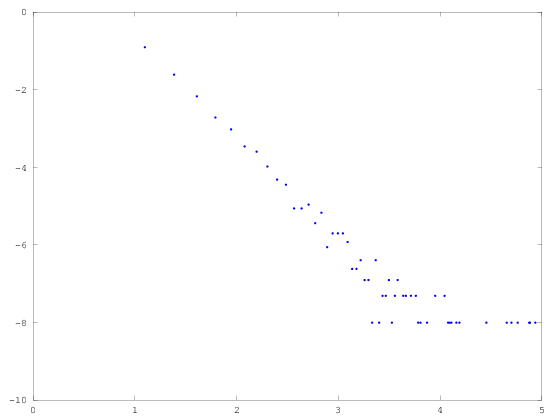

In [28]:
n_vertex=m+n_step-1;
dist=edge2dist(edge,n_vertex);
plot(log(1:size(dist,1)),log(dist/n_vertex),'.')


In [ ]:
dlmwrite('edgelist_octave',edge,' ');